In [1]:
import matplotlib.pyplot as plt

SYS_TICKETS = 10000
TIME = 20

class Job:
    def __init__(self, name: str, marker: str, tickets: int):
        self.name = name
        self.marker = marker
        self.tickets = tickets
        self.stride = SYS_TICKETS / tickets
        self.cur_pass_value = 0
        self.cpu_shares = 0
        self.pass_values = [0]

In [2]:
jobs = [Job("A", ".", 100), Job("B", "v", 50), Job("C", "s", 250)]

for time in range(TIME):
    # at time when "ideal" CPU shares is met, print it out
    if all(j.cur_pass_value == jobs[0].cur_pass_value for j in jobs):
        print(f"At time {time}, CPU shares:", list(map(lambda j: f"{j.name}: {j.cpu_shares}", jobs)))
    
    # select job w/ the least pass value
    job = min(jobs, key=lambda j: j.cur_pass_value)
    job.cur_pass_value += job.stride
    job.cpu_shares += 1
    
    for j in jobs:
        j.pass_values.append(j.cur_pass_value)

At time 0, CPU shares: ['A: 0', 'B: 0', 'C: 0']
At time 8, CPU shares: ['A: 2', 'B: 1', 'C: 5']
At time 16, CPU shares: ['A: 4', 'B: 2', 'C: 10']


(a)


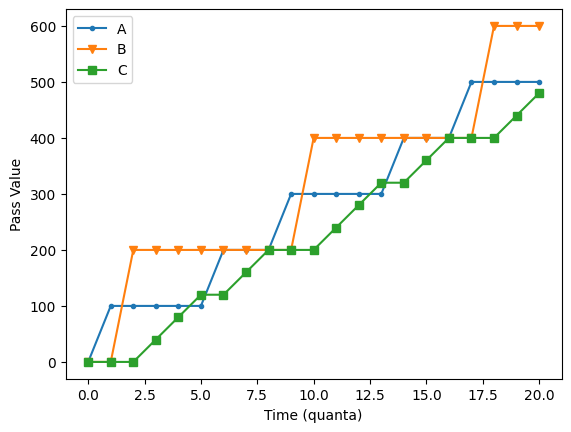

In [3]:
print("(a)")

x = [x for x in range(TIME+1)]

for job in jobs:
    plt.plot(x, job.pass_values, label=job.name, marker=job.marker)
plt.legend()
plt.xlabel("Time (quanta)")
plt.ylabel("Pass Value")
plt.show()

(b) 

Stride scheduling does a pretty good job at allocating CPU shares fairly to the jobs. 

For all the jobs, they will eventually be given the same amount of CPU shares as their ticket ratios will be. 

For this case, jobs A, B and C have a ticket ratio of 2:1:5 and multiples of that will be reached as CPU shares eventually.


(c) 

Using a period of the sum of the ticket ratio (in this case it's 2+1+5, 8) will show the best case of CPU sharing. 

Using a different period can show unfairness as some jobs would not have its turn yet, giving a false idea of the allocation. 

In this case it would be using a period like 3 where job C might seem to be left out.

In [4]:
PERIOD = 3

jobs = [Job("A", ".", 100), Job("B", "v", 50), Job("C", "s", 250)]

for time in range(TIME):
    if time % PERIOD == 0:
        print(f"At time {time}, CPU shares:", list(map(lambda j: f"{j.name}: {j.cpu_shares}", jobs)))
    
    # select job w/ the least pass value
    job = min(jobs, key=lambda j: j.cur_pass_value)
    job.cur_pass_value += job.stride
    job.cpu_shares += 1
    
    for j in jobs:
        j.pass_values.append(j.cur_pass_value)

At time 0, CPU shares: ['A: 0', 'B: 0', 'C: 0']
At time 3, CPU shares: ['A: 1', 'B: 1', 'C: 1']
At time 6, CPU shares: ['A: 2', 'B: 1', 'C: 3']
At time 9, CPU shares: ['A: 3', 'B: 1', 'C: 5']
At time 12, CPU shares: ['A: 3', 'B: 2', 'C: 7']
At time 15, CPU shares: ['A: 4', 'B: 2', 'C: 9']
At time 18, CPU shares: ['A: 5', 'B: 3', 'C: 10']


(d)

As the number of jobs increase, the ratio of job tickets will change as well. If the job is added mid-way, the new job will be given all the CPU time which may seem unfair until its pass value catches up with the other jobs. If the number of jobs were to increase asymptotically, the amount of time used to catch up may exceed the time to actually allocate old jobs.

But if a point where all jobs having the same pass value is met, It would be equal again with their CPU shares matching a multiple of their ticket ratios. But as the number of jobs increase asymptotically, the ticket ratios may reach a high enough value where the period would be "unattainable".

With an incredibly high number of jobs also requires much more computation time for the scheduler as it has to find the job with the lowest pass value.

Below is an example of adding jobs mid-way and how the stride scheduler would allocate the jobs

At time 0, CPU shares: ['A: 0', 'B: 0', 'C: 0']
At time 8, CPU shares: ['A: 2', 'B: 1', 'C: 5']
At time 16, CPU shares: ['A: 4', 'B: 2', 'C: 10']
At time 24, CPU shares: ['A: 6', 'B: 3', 'C: 15']
At time 32, CPU shares: ['A: 8', 'B: 4', 'C: 20']
At time 40, CPU shares: ['A: 10', 'B: 5', 'C: 25']
At time 48, CPU shares: ['A: 12', 'B: 6', 'C: 30']
At time 56, CPU shares: ['A: 14', 'B: 7', 'C: 35']
At time 61, Job D is added
At time 88, Job D is added
At time 110, Job D is added
At time 192, CPU shares: ['A: 16', 'B: 8', 'C: 40', 'D: 24', 'E: 48', 'F: 56']
At time 216, CPU shares: ['A: 18', 'B: 9', 'C: 45', 'D: 27', 'E: 54', 'F: 63']
At time 240, CPU shares: ['A: 20', 'B: 10', 'C: 50', 'D: 30', 'E: 60', 'F: 70']


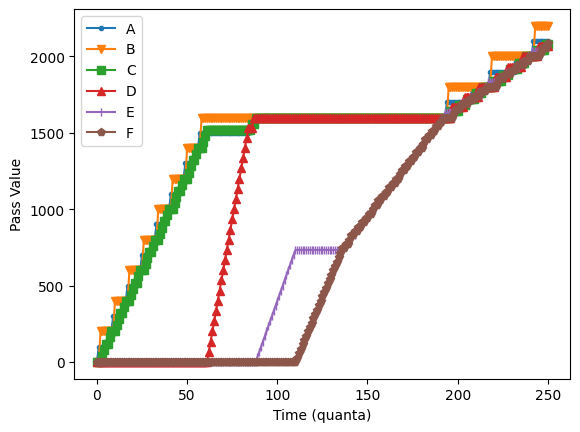

In [5]:
TIME = 250
PASS_VALUE_THRESHOLD = 1

jobs = [Job("A", ".", 100), Job("B", "v", 50), Job("C", "s", 250)]

def add_job(time, name: str, symbol: str, tickets: int):
    print(f"At time {time}, Job D is added")
    new_job = Job(name, symbol, tickets)
    new_job.pass_values = [0 for _ in range(time+1)]
    jobs.append(new_job)

for time in range(TIME):
    # new job at t=61
    if time == 61:
        add_job(time, "D", "^", 150)
        
    # new job at t=88
    if time == 88:
        add_job(time, "E", "|", 300)
        
    # new job at t=110
    if time == 110:
        add_job(time, "F", "p", 350)
      
    # in this case, we allow the pass values to have a variance of 1 
    # because reaching the exact same pass value is rare due to rounding
    if all(abs(j.cur_pass_value - jobs[0].cur_pass_value) <= PASS_VALUE_THRESHOLD for j in jobs):
        print(f"At time {time}, CPU shares:", list(map(lambda j: f"{j.name}: {j.cpu_shares}", jobs))) 
    
    # select job w/ the least pass value
    job = min(jobs, key=lambda j: j.cur_pass_value)
    job.cur_pass_value += job.stride
    job.cpu_shares += 1
    
    for j in jobs:
        j.pass_values.append(j.cur_pass_value)

x = [x for x in range(TIME+1)]

# draw each line
for job in jobs:
    plt.plot(x, job.pass_values, label=job.name, marker=job.marker)
plt.legend()
plt.xlabel("Time (quanta)")
plt.ylabel("Pass Value")
plt.show()

In the situation above, when new jobs are added old jobs have to be idle until the new job catches up. 